#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mean_mnist_rect = 6.04232899902181
mean_wave_rect = 4.279016714528333
mean_flip_rect = 11.533344378531671

In [3]:
dev_mnist_rect = 4.982769355625175
dev_wave_rect = 2.1336296236907804
dev_flip_rect = 6.195559060658184

In [4]:
mean_mnist_dale = 0.8350956027391857
mean_wave_dale = 0.3841710694918541
mean_flip_dale = 2.0024827297080807

In [5]:
dev_mnist_dale = 0.26029257396381156
dev_wave_dale = 0.020620606279076102
dev_flip_dale = 3.586961110986972

#### Construct arrays for KL divergences

In [6]:
categories = ['Flip-flop', 'Wave reconstruction', 'Sequential MNIST']
group_labels = ['Rectified Backprop', 'Dales Backprop']

means1 = [mean_flip_rect, mean_wave_rect, mean_mnist_rect]  # Mean values for group 1
devs1 = [dev_flip_rect, dev_wave_rect, dev_mnist_rect]    # Standard deviations or variances for group 1

means2 = [mean_flip_dale, mean_wave_dale, mean_mnist_dale]  # Mean values for group 2
devs2 = [dev_flip_dale, dev_wave_dale, dev_mnist_dale]  # Standard deviations or variances for group 2

# Calculate error bars
error1 = [0.5 * d for d in devs1]
error2 = [0.5 * d for d in devs2]

bar_width = 0.25

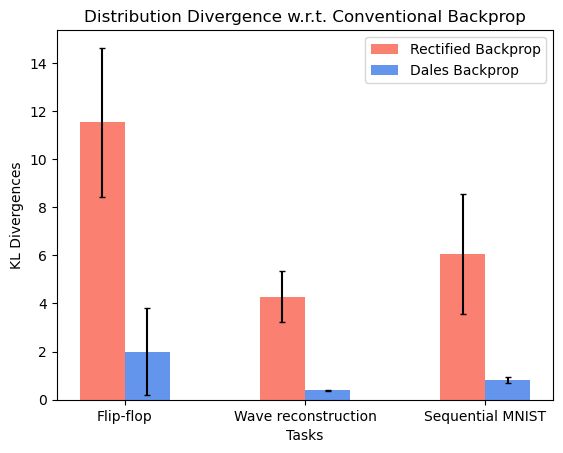

In [7]:
# Set the positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Plot grouped bar plot
fkl = plt.figure()
plt.bar(r1, means1, yerr=error1, capsize=2, width=bar_width, label='Rectified Backprop', color='salmon')
plt.bar(r2, means2, yerr=error2, capsize=2, width=bar_width, label='Dales Backprop', color='cornflowerblue')

# Add xticks on the middle of the group bars
plt.xlabel('Tasks')
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories)

# Add labels and title
plt.ylabel('KL Divergences')
plt.title('Distribution Divergence w.r.t. Conventional Backprop')

# Add legend
plt.legend()

# Show plot
plt.show()

In [8]:
fkl.savefig('kl-weight-divergences.svg',dpi=250)

#### Load all init and final weights

In [9]:
def load_dict(npz_path):
    data = np.load(npz_path, allow_pickle=True)
    data = {key: data[key] for key in data.files}
    return data['arr_0'].ravel()[0]

In [10]:
weights_init_conventional_wave = load_dict('wave_recon_weights_init_conventional.npz')
weights_init_rectified_wave = load_dict('wave_recon_weights_init_rectified.npz')
weights_init_dales_wave = load_dict('wave_recon_weights_init_dales.npz')

In [11]:
weights_final_conventional_wave = load_dict('wave_recon_weights_final_conventional.npz')
weights_final_rectified_wave = load_dict('wave_recon_weights_final_rectified.npz')
weights_final_dales_wave = load_dict('wave_recon_weights_final_dales.npz')

In [12]:
weights_init_conventional_mnist = load_dict('seq_mnist_weights_init_conventional.npz')
weights_init_rectified_mnist = load_dict('seq_mnist_weights_init_rectified.npz')
weights_init_dales_mnist = load_dict('seq_mnist_weights_init_dales.npz')

In [13]:
weights_final_conventional_mnist = load_dict('seq_mnist_weights_final_conventional.npz')
weights_final_rectified_mnist = load_dict('seq_mnist_weights_final_rectified.npz')
weights_final_dales_mnist = load_dict('seq_mnist_weights_final_dales.npz')

In [14]:
weights_init_conventional_flip = load_dict('seq_mnist_weights_init_conventional.npz')
weights_init_rectified_flip = load_dict('seq_mnist_weights_init_rectified.npz')
weights_init_dales_flip = load_dict('seq_mnist_weights_init_dales.npz')

In [15]:
weights_final_conventional_flip = load_dict('flipflop_weights_final_conventional.npz')
weights_final_rectified_flip = load_dict('flipflop_weights_final_rectified.npz')
weights_final_dales_flip = load_dict('flipflop_weights_final_dales.npz')

In [30]:
all_weights_init_conventional = np.concatenate(([weights_init_conventional_flip[key].ravel() for key in sorted(weights_init_conventional_flip.keys())],
                                                [weights_init_conventional_wave[key].ravel() for key in sorted(weights_init_conventional_wave.keys())],
                                                 [weights_init_conventional_mnist[key].ravel() for key in sorted(weights_init_conventional_mnist.keys())]
                                               )).ravel()

In [31]:
all_weights_init_rectified = np.concatenate(([weights_init_rectified_flip[key].ravel() for key in sorted(weights_init_rectified_flip.keys())],
                                                [weights_init_rectified_wave[key].ravel() for key in sorted(weights_init_rectified_wave.keys())],
                                                 [weights_init_rectified_mnist[key].ravel() for key in sorted(weights_init_rectified_mnist.keys())]
                                               )).ravel()

In [32]:
all_weights_init_dales = np.concatenate(([weights_init_dales_flip[key].ravel() for key in sorted(weights_init_dales_flip.keys())],
                                                [weights_init_dales_wave[key].ravel() for key in sorted(weights_init_dales_wave.keys())],
                                                 [weights_init_dales_mnist[key].ravel() for key in sorted(weights_init_dales_mnist.keys())]
                                               )).ravel()

In [49]:
all_weights_final_conventional = np.concatenate(([weights_final_conventional_flip[key].ravel() for key in sorted(weights_final_conventional_flip.keys())],
                                                [weights_final_conventional_wave[key].ravel() for key in sorted(weights_final_conventional_wave.keys())],
                                                 [weights_final_conventional_mnist[key].ravel() for key in sorted(weights_final_conventional_mnist.keys())]
                                               )).ravel()

In [34]:
all_weights_final_rectified = np.concatenate(([weights_final_rectified_flip[key].ravel() for key in sorted(weights_final_rectified_flip.keys())],
                                                [weights_final_rectified_wave[key].ravel() for key in sorted(weights_final_rectified_wave.keys())],
                                                 [weights_final_rectified_mnist[key].ravel() for key in sorted(weights_final_rectified_mnist.keys())]
                                               )).ravel()

In [35]:
all_weights_final_dales = np.concatenate(([weights_final_dales_flip[key].ravel() for key in sorted(weights_final_dales_flip.keys())],
                                                [weights_final_dales_wave[key].ravel() for key in sorted(weights_final_dales_wave.keys())],
                                                 [weights_final_dales_mnist[key].ravel() for key in sorted(weights_final_dales_mnist.keys())]
                                               )).ravel()

In [37]:
def plot_weights_kde(all_weights, col, label, linestyle=None, fill=False):        
    sns.kdeplot(data=all_weights, color=col, label=label, linestyle=linestyle, fill=fill)
    plt.legend()

Text(0.5, 1.0, 'Final Weights')

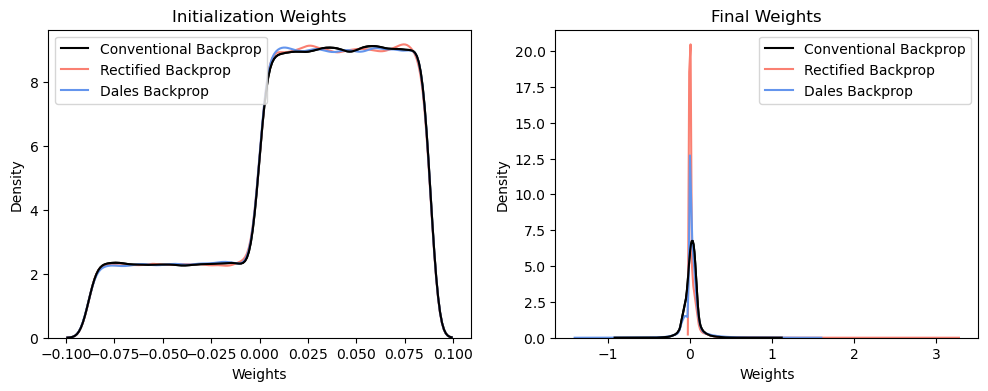

In [45]:
fweight_dists = plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_weights_kde(all_weights_init_conventional,'k', 'Conventional Backprop')
plot_weights_kde(all_weights_init_rectified,'salmon', 'Rectified Backprop')
plot_weights_kde(all_weights_init_dales,'cornflowerblue', 'Dales Backprop')
plot_weights_kde(all_weights_init_conventional,'k', None)
plt.xlabel('Weights')
# plt.ylabel('Counts')
plt.title('Initialization Weights')

plt.subplot(122)
plot_weights_kde(all_weights_final_conventional,'k', 'Conventional Backprop')
plot_weights_kde(all_weights_final_rectified,'salmon', 'Rectified Backprop')
plot_weights_kde(all_weights_final_dales,'cornflowerblue', 'Dales Backprop')
plot_weights_kde(all_weights_final_conventional,'k', None)
plt.xlabel('Weights')
# plt.ylabel('Counts')
plt.title('Final Weights')

In [46]:
fweight_dists.savefig('weight_dists_all_backprop.svg', dpi=250)

#### Plot weight averaged matrices

In [53]:
N = 128
nRuns = 5
nTasks = 3

In [61]:
all_weights_final_conventional_mean = np.mean(all_weights_final_conventional.reshape(nTasks*nRuns,N,N),0)
all_weights_final_dales_mean = np.mean(all_weights_final_dales.reshape(nTasks*nRuns,N,N),0)
all_weights_final_rectified_mean = np.mean(all_weights_final_rectified.reshape(nTasks*nRuns,N,N),0)

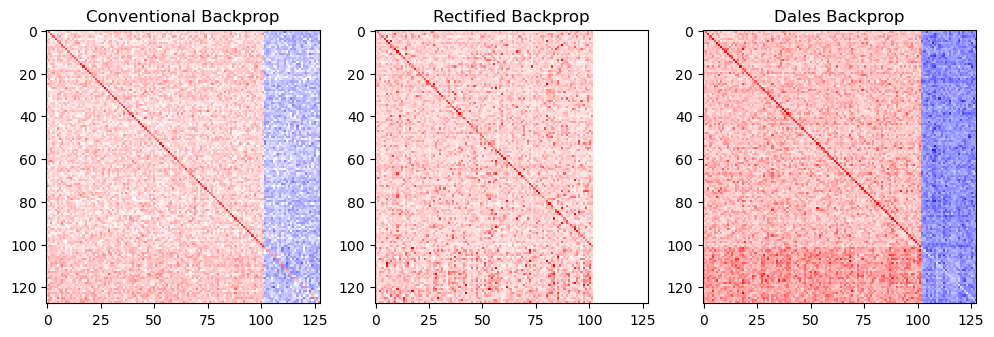

In [107]:
fweights_img = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(all_weights_final_conventional_mean,interpolation='nearest',cmap='bwr')
# plt.clim(-0.189, 0.284)
plt.clim(-0.2,0.2)
plt.title('Conventional Backprop')

plt.subplot(132)
plt.imshow(all_weights_final_rectified_mean,interpolation='nearest',cmap='bwr')
plt.clim(-0.2,0.2)
plt.title('Rectified Backprop')

plt.subplot(133)
plt.imshow(all_weights_final_dales_mean,interpolation='nearest',cmap='bwr')
plt.clim(-0.2,0.2)
plt.title('Dales Backprop')

plt.show()

In [109]:
fweights_img.savefig('final_weights_mean_all.svg',dpi=250)

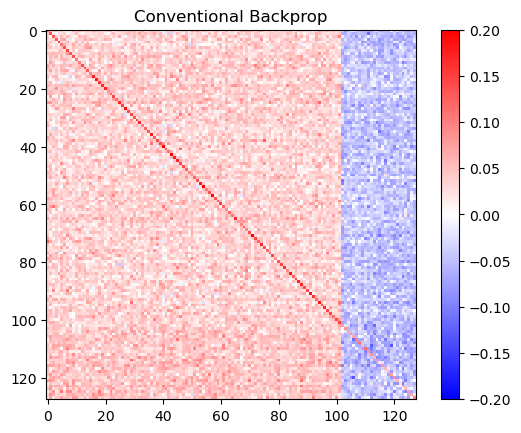

In [106]:
fcbar = plt.figure()
plt.imshow(all_weights_final_conventional_mean,interpolation='nearest',cmap='bwr')
plt.clim(-0.2, 0.2)
plt.title('Conventional Backprop')
plt.colorbar()

In [110]:
fcbar.savefig('final_weights_mean_all_colorbar.svg',dpi=250)